# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'lab2data/train.p'
testing_file = 'lab2data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
### To start off let's do a basic data summary.
# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
classes = {}
for labelinTraining in y_train:
    classes[labelinTraining] = classes.get(labelinTraining, 0) + 1
n_classes = len(list(classes))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [53]:
#importing some useful packages for plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#import pandas for csv file import
#NOTE: install pandas in your environment!
#conda install pandas
import pandas as pd

In [194]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# get the label description from the CSV file.
classLabelList = pd.read_csv('signnames.csv')

# Analyze Max and Min sizes (number of pixels) of the original image
sizeStats = pd.DataFrame(train['sizes'])
print("Sizes Stats:")
print(sizeStats.describe())

originalSizes = {}
mostCommonCount = 0
mostCommonSize = 0
for i in range(len(train['sizes'])):
    # for each size
    sizes = train['sizes'][i]
    
    # create a pixel hash
    numpixelsStr = str(int(sizes[0])*int(sizes[1]))
    
    # try to see if there is a hash hit
    sizeInstance = originalSizes.get(numpixelsStr, {'count': 0})
    
    # add to the count
    count = sizeInstance['count'] + 1
    
    # put in the last Index
    originalSizes[numpixelsStr] = {'lastIdx':i, 'count': count, 'size':sizes}
    
    # update most common size
    if count > mostCommonCount:
        mostCommonCount = count
        mostCommonSize = originalSizes[numpixelsStr]
    
# get the list of sizes and sort them
sortedSizes = np.array(list(originalSizes.keys()), np.int32)
sortedSizes.sort()

# get the unique number of original picture sizes and the min and max last instance
n_sizes = len(sortedSizes)
minSize = sortedSizes[0]
maxSize = sortedSizes[n_sizes-1]

# print the stats
print("\nNumber of unique original sizes in training set: ", n_sizes)


Sizes Stats:
                  0             1
count  39209.000000  39209.000000
mean      50.328930     50.835880
std       23.115423     24.306933
min       25.000000     25.000000
25%       35.000000     35.000000
50%       43.000000     43.000000
75%       58.000000     58.000000
max      225.000000    243.000000

Number of unique original sizes in training set:  2034


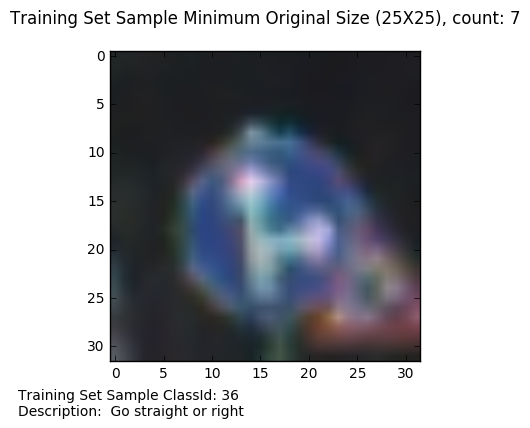

In [228]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# draw the min size picture
size = originalSizes[str(minSize)]['size']
count = originalSizes[str(minSize)]['count']
index = originalSizes[str(minSize)]['lastIdx']
classId = train['labels'][index]
description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
fg = plt.figure()
fg.text(0.1,-0.01,'Training Set Sample ClassId: %d\nDescription:  %s'%(classId,description))
plt.title('Training Set Sample Minimum Original Size (%dX%d), count: %d\n'%(size[0], size[1],count))
plt.imshow(X_train[index])



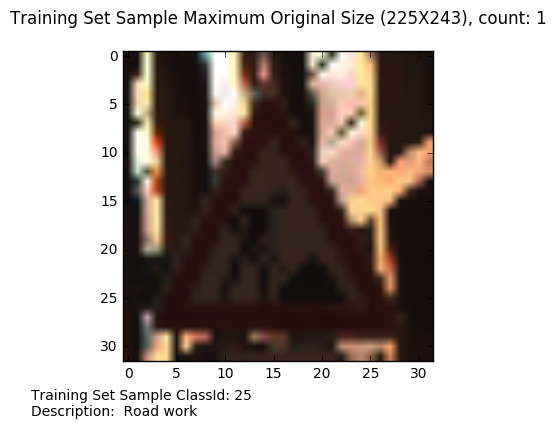

In [227]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# draw the max size picture
size = originalSizes[str(maxSize)]['size']
count = originalSizes[str(maxSize)]['count']
index = originalSizes[str(maxSize)]['lastIdx']
classId = train['labels'][index]
description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
fg = plt.figure()
fg.text(0.1,-0.01,'Training Set Sample ClassId: %d\nDescription:  %s'%(classId,description))
plt.title('Training Set Sample Maximum Original Size (%dX%d), count: %d\n'%(size[0], size[1],count))
plt.imshow(X_train[index])


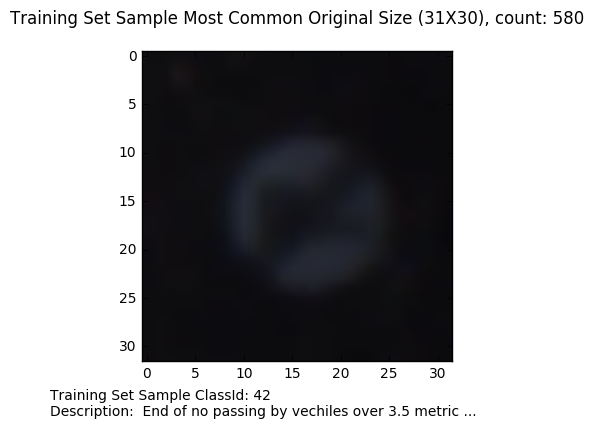

In [226]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# draw the max size picture
size = mostCommonSize['size']
count = mostCommonSize['count']
index = mostCommonSize['lastIdx']
classId = train['labels'][index]
description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
fg = plt.figure()
fg.text(0.1,-0.01,'Training Set Sample ClassId: %d\nDescription:  %s'%(classId,description))
plt.title('Training Set Sample Most Common Original Size (%dX%d), count: %d\n'%(size[0], size[1],count))
plt.imshow(X_train[index])


In [271]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# x,y plot of the image locations
labelsStats = pd.DataFrame(y_train)
print("Labels Stats:")
print(labelsStats.describe())

labelsInfo = {}
mostCommonCount = 0
mostCommonLabel = 0
for i in range(len(y_train)):
    # for each label
    label = str(y_train[i])
    
    # try to see if there is a hash hit
    labelInstance = labelsInfo.get(label, {'count': 0})
    
    # add to the count
    count = labelInstance['count'] + 1
    
    # put in the last Index
    labelsInfo[label] = {'lastIdx':i, 'count': count, 'label':int(label)}
    
    # update most common size
    if count > mostCommonCount:
        mostCommonCount = count
        mostCommonSize = labelsInfo[label]
    
# get the list of counts and sort them
sortedLabels = list(labelsInfo.keys())

def compare_count(label):
    return labelsInfo[label]['count']

sortedLabels.sort(key=compare_count)

# get the unique number of original picture sizes and the min and max last instance
n_labels = len(sortedLabels)
minLabel = sortedLabels[0]
maxLabel = sortedLabels[n_labels-1]


# print the stats
print("\nNumber of unique labels in training set: ", n_labels)
print("\nDistribution of training set labels:")
for i in range(n_labels):
    classId = labelsInfo[str(i)]['label']
    index = labelsInfo[str(i)]['lastIdx']
    count = labelsInfo[str(i)]['count']
    description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
    print("Training Set count: {0:4d}  ClassId: {1:02d}  Description: {2}".format(count, classId, description))


Labels Stats:
                  0
count  39209.000000
mean      15.788390
std       12.013238
min        0.000000
25%        5.000000
50%       12.000000
75%       25.000000
max       42.000000

Number of unique labels in training set:  43

Distribution of training set labels:
Training Set count:  210  ClassId: 00  Description: Speed limit (20km/h)
Training Set count: 2220  ClassId: 01  Description: Speed limit (30km/h)
Training Set count: 2250  ClassId: 02  Description: Speed limit (50km/h)
Training Set count: 1410  ClassId: 03  Description: Speed limit (60km/h)
Training Set count: 1980  ClassId: 04  Description: Speed limit (70km/h)
Training Set count: 1860  ClassId: 05  Description: Speed limit (80km/h)
Training Set count:  420  ClassId: 06  Description: End of speed limit (80km/h)
Training Set count: 1440  ClassId: 07  Description: Speed limit (100km/h)
Training Set count: 1410  ClassId: 08  Description: Speed limit (120km/h)
Training Set count: 1470  ClassId: 09  Description: No p

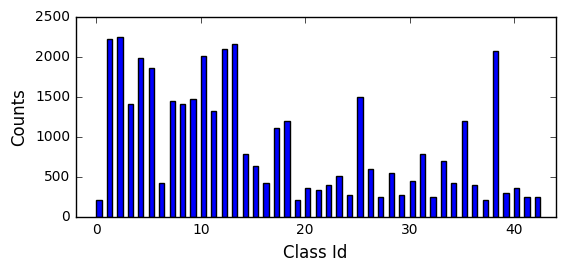

In [272]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Plot bar graph of class id count distribution
x = range(0, n_labels)
y = [labelsInfo[str(n)]['count'] for n in x]
fg = plt.figure()
ax1 = fg.add_axes((.1,.4,.8,.5))
ax1.bar(x,y,0.5)
plt.xlim((-2.0, 44))
plt.ylabel("Counts", fontsize = 12)
plt.xlabel("Class Id", fontsize = 12)
plt.show()


In [274]:
# print the stats
print("\nDistribution of training set labels in sorted count order:")
for i in range(n_labels):
    classId = labelsInfo[str(sortedLabels[i])]['label']
    index = labelsInfo[str(sortedLabels[i])]['lastIdx']
    count = labelsInfo[str(sortedLabels[i])]['count']
    description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
    print("Training Set count: {0:4d}  ClassId: {1:02d}  Description: {2}".format(count, classId, description))



Distribution of training set labels in sorted count order:
Training Set count:  210  ClassId: 37  Description: Go straight or left
Training Set count:  210  ClassId: 00  Description: Speed limit (20km/h)
Training Set count:  210  ClassId: 19  Description: Dangerous curve to the left
Training Set count:  240  ClassId: 42  Description: End of no passing by vechiles over 3.5 metric ...
Training Set count:  240  ClassId: 27  Description: Pedestrians
Training Set count:  240  ClassId: 32  Description: End of all speed and passing limits
Training Set count:  240  ClassId: 41  Description: End of no passing
Training Set count:  270  ClassId: 24  Description: Road narrows on the right
Training Set count:  270  ClassId: 29  Description: Bicycles crossing
Training Set count:  300  ClassId: 39  Description: Keep left
Training Set count:  330  ClassId: 21  Description: Double curve
Training Set count:  360  ClassId: 40  Description: Roundabout mandatory
Training Set count:  360  ClassId: 20  Desc

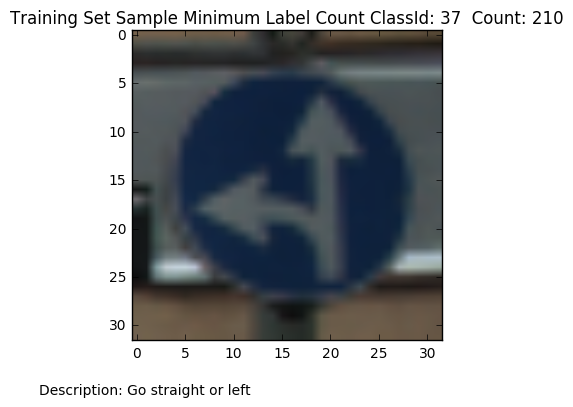

In [230]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# list minimium count for class id and draw a sample picture.
classId = labelsInfo[str(minLabel)]['label']
index = labelsInfo[str(minLabel)]['lastIdx']
count = labelsInfo[str(minLabel)]['count']
description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
fg = plt.figure()
fg.text(0.1,-0.01,'Description: %s'%(description))
plt.title('Training Set Sample Minimum Label Count ClassId: %d  Count: %d'%(classId,count))
plt.imshow(X_train[index])

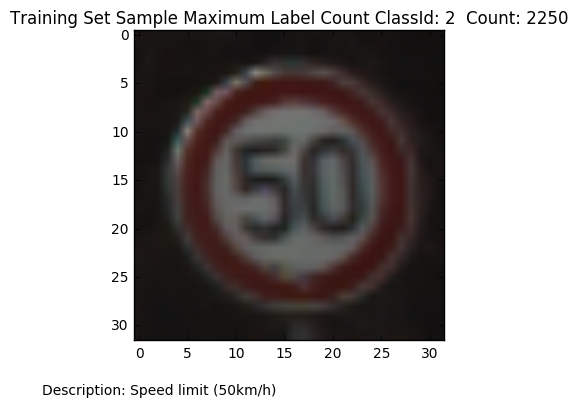

In [231]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# list maximium count for class id and draw a sample picture.
classId = labelsInfo[str(maxLabel)]['label']
index = labelsInfo[str(maxLabel)]['lastIdx']
count = labelsInfo[str(maxLabel)]['count']
description = classLabelList[classLabelList.ClassId==classId].SignName.to_string(header=False,index=False)
fg = plt.figure()
fg.text(0.1,-0.01,'Description: %s'%(description))
plt.title('Training Set Sample Maximum Label Count ClassId: %d  Count: %d'%(classId,count))
plt.imshow(X_train[index])

In [279]:
# It seems that the 'sizes' (width, height) and 'coords' (x1, y1, x2, y2) features have the same values?
# Looks like we cannot get any real information from the 'coords' feature.
allsame = True
for i in range(n_train):
    if not (train['sizes'][i].all() == train['coords'][i].all()):
        allsame = False
if allsame:
    print("train['sizes'] == train['coords']!!!\nIgnoring 'coords' feature in train dataset.\n")

allsame = True
for i in range(n_test):
    if not (test['sizes'][i].all() == test['coords'][i].all()):
        allsame = False
if allsame:
    print("test['sizes'] == test['coords']!!!\nIgnoring 'coords' feature in test dataset.\n")



train['sizes'] == train['coords']!!!
Ignoring 'coords' feature in train dataset.

test['sizes'] == test['coords']!!!
Ignoring 'coords' feature in test dataset.



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [2]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [5]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.